# Comparing Dimensionality Reduction Methods

## Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install umap-learn


import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
from scipy.io import loadmat
from IPython.display import display, HTML

from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
import umap


from sklearn.metrics import silhouette_samples, silhouette_score, rand_score, adjusted_rand_score
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, calinski_harabasz_score, davies_bouldin_score
# from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import minmax_scale

from yellowbrick.cluster import KElbowVisualizer

from IPython.display import clear_output
clear_output()

## Loading indian pines data

Indian Pines is a Hyperspectral image segmentation dataset. The input data consists of hyperspectral bands over a single landscape in Indiana, US, (Indian Pines data set) with 145×145 pixels. For each pixel, the data set contains 220 spectral reflectance bands which represent different portions of the electromagnetic spectrum in the wavelength range 0.4−2.5⋅10−6.

In [3]:
# Import the data
data_array = loadmat('./Indian_pines_corrected.mat')['indian_pines_corrected'] # Hyperspectral data
gt = loadmat('./Indian_pines_gt.mat')['indian_pines_gt'] # Ground truth data

## Visualizing the data
The hyperspectral data is visualized using the gray colour map while the ground truth is visualized using nipy_spectral colour map.

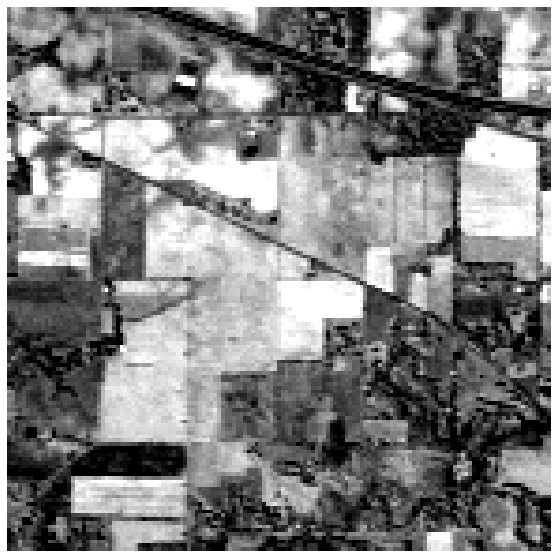

In [4]:
# Visualize
# Read and enhance
vmin, vmax = np.nanpercentile(data_array[:, :, 100], (5,95)) # 5-95% pixel values stretch
# Plot the enhanced image of a spectral band
fig = plt.figure(figsize=[15, 10])
plt.axis('off')
plt.imshow(data_array[:, :, 100], cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

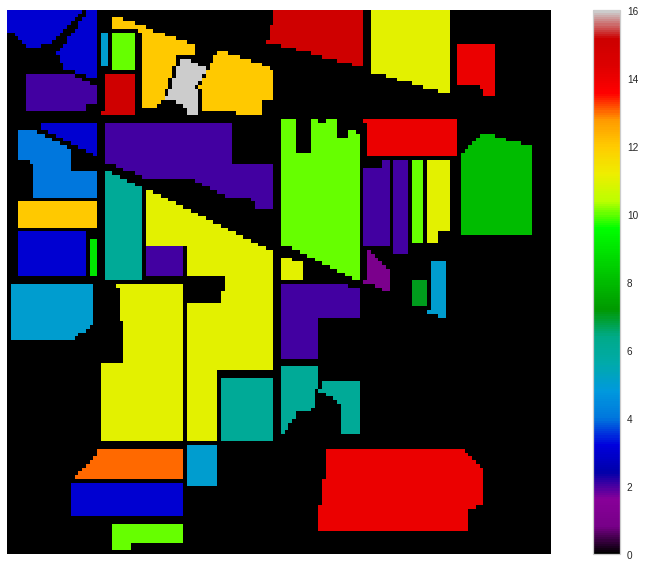

In [5]:
# Plot the ground truth by creating a function named plot data
def plot_data(data):
    fig = plt.figure(figsize = (15, 10))
    plt.imshow(data, cmap = 'nipy_spectral')
    plt.colorbar()
    plt.axis('off')
    plt.show()

plot_data(gt)

# Scaling the data

To bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the choice of selected components just because of their large magnitude.

In [6]:
# Reshape the input data from rcb to samples and features
data_reshaped = data_array.reshape(data_array.shape[0]*data_array.shape[1], -1)
data_reshaped = minmax_scale(data_reshaped, feature_range=(0, 1), axis=0, copy=False)
gt_reshaped = gt.flatten()

## Principal Component Analysis
A statistical technique called principal component analysis (PCA) uses an orthogonal transformation to change a set of correlated variables into a set of uncorrelated ones. It is the most used tool for exploratory data analysis and machine learning predictive models.

In [7]:
# PCA
pca = PCA()
components = pca.fit_transform(data_reshaped)
# eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

#Taking components which account to 90% of variance
var_sum = 0
for i in range(len(var_ratio)):
    if var_sum >= 0.90:
        break
    else:
        var_sum += var_ratio[i]

selected_components_pca = components[:, :i]
print('Number of spectral bands:', data_reshaped.shape[1])
print(f'Number of selected principal components: {i}')

Number of spectral bands: 200
Number of selected principal components: 2


## TSNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that is particularly well suited for the visualisation of large datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large datasets.

In [8]:
#TSNE
#setting the hyperparameters
keep_dims = 2
lrn_rate = 700
prp = 40
#extract the data as a copy
tsnedf = data_reshaped.copy()
#creating the tsne model
tsne = TSNE(n_components = keep_dims, 
            random_state = 42,
            )
#apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
#check the shape
print('Number of spectral bands:', data_reshaped.shape[1])
selected_components_tsne=X_dimensions[:,:keep_dims]
print(f'Number of selected components: {keep_dims}')

Number of spectral bands: 200
Number of selected components: 2


## LLE

The LLE algorithm is an unsupervised dimensionality reduction method. It attempts to minimise these n-Dimensions while retaining the geometric features of the original non-linear feature structure.

In [9]:
#Locally Linear Embedding

#extract the data as a copy
lle = data_reshaped.copy()
n_components=2
embedding=LocallyLinearEmbedding(n_components=n_components)

#applying dimensionality reduction to data
X_transformed = embedding.fit_transform(lle)
print(X_transformed.shape)
selected_components_lle=X_transformed[:,:n_components]
print('Number of spectral bands:', data_reshaped.shape[1])
print(f'Number of selected components: {n_components}')

(21025, 2)
Number of spectral bands: 200
Number of selected components: 2


In [10]:
#Locally Linear Embedding in 3 dimensions

lle_3d = data_reshaped.copy()
embedding=LocallyLinearEmbedding(n_components=3 )

#applying dimensionality reduction to data

X_transformed = embedding.fit_transform(lle_3d)
selected_components_lle_3d=X_transformed[:,:3]
print('Number of spectral bands:', data_reshaped.shape[1])
print(f'Number of selected components: {X_transformed.shape[1]}')

Number of spectral bands: 200
Number of selected components: 3


## Modified LLE

It is an modified version of LLE which uses the locally linear embedding algorithm.

In [11]:
#Modified LLE

#Creating a Modified Locally Linear Embedding

lle_modified = data_reshaped.copy()
embedding=LocallyLinearEmbedding(n_components=2, method='modified')
#applying dimensionality reduction to data

X_transformed = embedding.fit_transform(lle_modified)
selected_components_lle_modified=X_transformed[:,:2]
print('Number of spectral bands:', data_reshaped.shape[1])
print(f'Number of selected components: {X_transformed.shape[1]}')

Number of spectral bands: 200
Number of selected components: 2


## UMAP

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

In [12]:
#UMAP

#Creating a copy of data and UMAP embedding

umapdf = data_reshaped.copy()
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation')

#applying dimensionality reduction to data

X_transformed=embedding.fit_transform(umapdf)
selected_components_umap = X_transformed[:,:2]

print('Number of spectral bands:', data_reshaped.shape[1])
print(f'Number of selected components: {X_transformed.shape[1]}')

Number of spectral bands: 200
Number of selected components: 2


## K-Means clustering on hyperspectral data

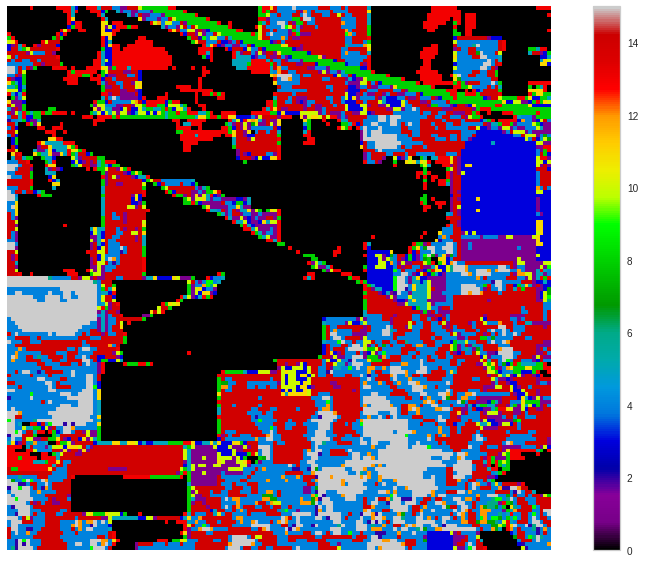

In [13]:
cl = cluster.KMeans(n_clusters=16, random_state=1) # Create an object of the classifier
param = cl.fit_predict(selected_components_lle) # Train
img_cl = cl.labels_ # Get the labels of the classes
img_cl = img_cl.reshape(data_array[:, :, 0].shape) # Reshape the labels to a 3D array (single band)
plot_data(img_cl)

## Creating different Cluster Maps

In [14]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_pca = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 2D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(selected_components_pca, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_pca, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_pca, clusterer.labels_)]
    scores_pca.iloc[[count]] = scores_temp

In [15]:
display(HTML(scores_pca.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.369762,0.695189,0.056849,0.650227,0.288964,41238.875944,0.815947
16.0,0.360363,0.698069,0.059292,0.655356,0.286875,40801.475882,0.828143
17.0,0.362289,0.697892,0.053435,0.663351,0.286252,40722.556225,0.809769


In [27]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_tsne = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 2D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(selected_components_tsne, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_tsne, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_tsne, clusterer.labels_)]
    scores_tsne.iloc[[count]] = scores_temp

In [17]:
display(HTML(scores_tsne.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.411213,0.699556,0.062598,0.638099,0.280678,22454.115597,0.777529
16.0,0.407473,0.699984,0.059261,0.653560,0.283591,22528.311315,0.753193
17.0,0.402825,0.699532,0.052990,0.646228,0.276550,22696.044547,0.787870


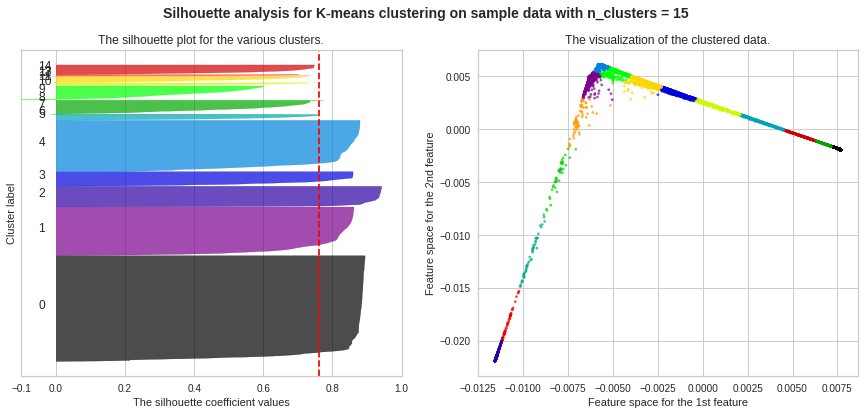

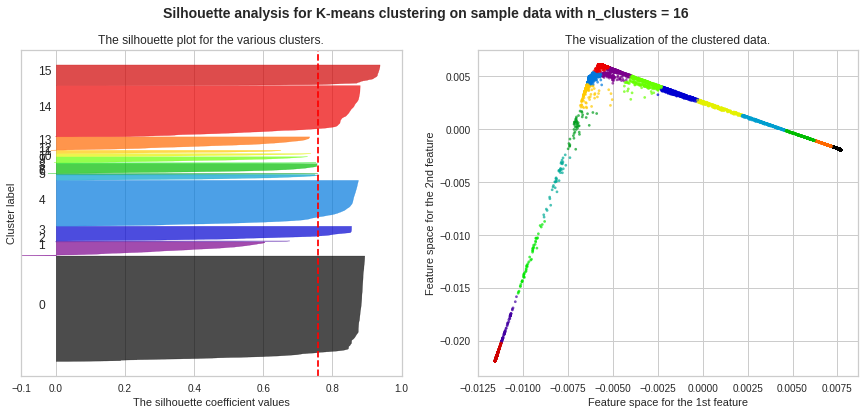

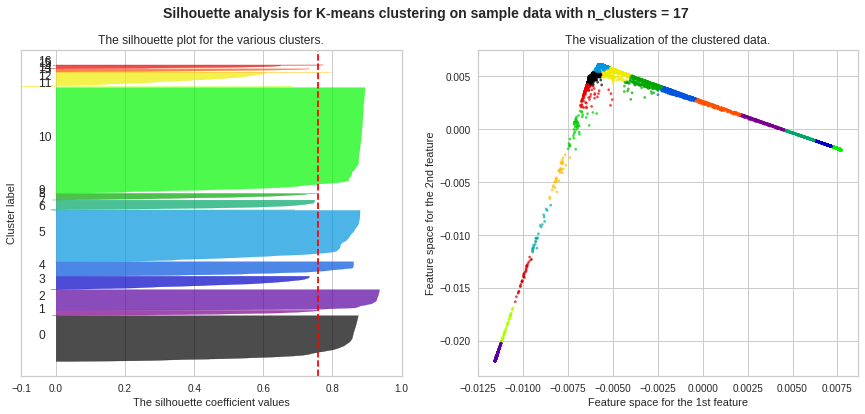

In [20]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_lle = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 2D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(figsize=[15, 6])
    ax1 = fig.add_subplot(1, 2, 1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(selected_components_lle) + (n_clusters + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks



    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_lle)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(selected_components_lle, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_lle, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_lle, clusterer.labels_)]
    scores_lle.iloc[[count]] = scores_temp

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(selected_components_lle, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2 = fig.add_subplot(1, 2, 2)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        selected_components_lle[:, 0], selected_components_lle[:, 1], 
        marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
    )

    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(
        'Silhouette analysis for K-means clustering on sample data with n_clusters = %d'
        % n_clusters,
        fontsize=14,
        fontweight='bold',
    )
    
    fig.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()

In [21]:
display(HTML(scores_lle.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.761160,0.634112,0.024265,0.577770,0.303396,1.296285e+06,0.448114
16.0,0.759153,0.633987,0.020107,0.578002,0.300321,1.356203e+06,0.453918
17.0,0.759322,0.633884,0.020051,0.578525,0.300372,1.379401e+06,0.459612


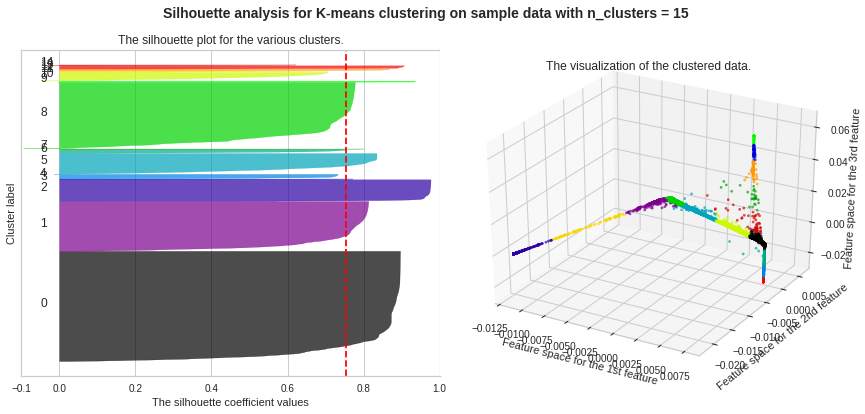

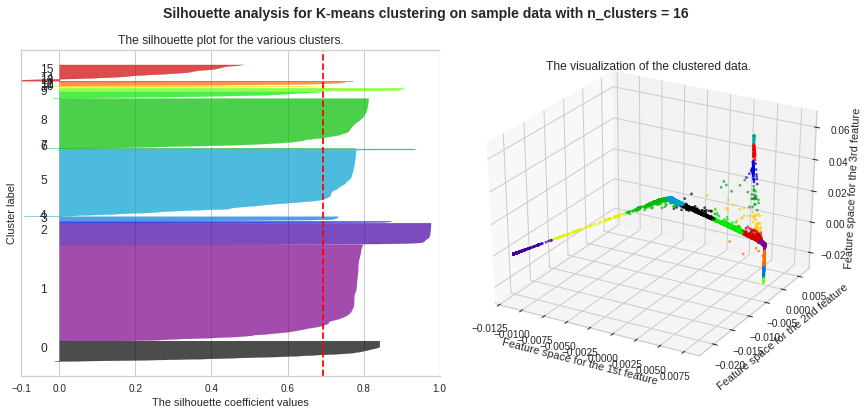

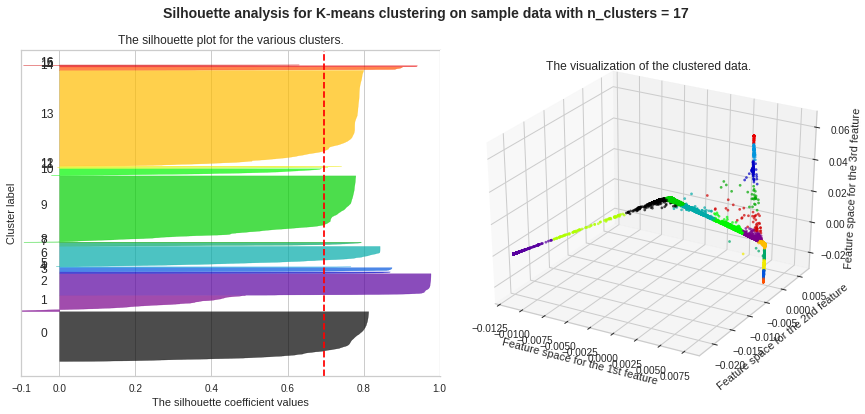

In [18]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_lle_3d = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 3D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure(figsize=[15, 6])
    ax1 = fig.add_subplot(1, 2, 1)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(selected_components_lle_3d) + (n_clusters + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_lle_3d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(selected_components_lle_3d, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_lle_3d, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_lle_3d, clusterer.labels_)]
    
    scores_lle_3d.iloc[[count]] = scores_temp

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(selected_components_lle_3d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        selected_components_lle_3d[:, 0], selected_components_lle_3d[:, 1], selected_components_lle_3d[:, 2],
        marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
    )

    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    ax2.set_zlabel('Feature space for the 3rd feature')

    plt.suptitle(
        'Silhouette analysis for K-means clustering on sample data with n_clusters = %d'
        % n_clusters,
        fontsize=14,
        fontweight='bold',
    )
    
    fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [19]:
display(HTML(scores_lle_3d.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.753316,0.633827,0.056091,0.554107,0.306298,249639.572050,0.412527
16.0,0.694345,0.652695,0.074114,0.574557,0.305804,261941.812606,0.456900
17.0,0.696884,0.653349,0.074957,0.575685,0.305207,273001.609002,0.449322


In [22]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_lle_modified = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 2D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_lle_modified)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(selected_components_lle_modified, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_lle_modified, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_lle_modified, clusterer.labels_)]
    scores_lle_modified.iloc[[count]] = scores_temp



In [23]:
display(HTML(scores_lle_modified.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.547235,0.690632,0.061012,0.599568,0.275073,99168.225998,0.594881
16.0,0.557222,0.690837,0.059682,0.607830,0.275897,101759.193064,0.576673
17.0,0.532296,0.692717,0.052760,0.614202,0.272706,103651.707056,0.605209


In [24]:
# Calculate different performance metrics for various numbers of clusters
range_n_clusters = list(range(15, 18))
columns = ['Number of clusters', 'Average Silhouette score', 'Rand index', 'Adjusted Rand index', 'Mutual Information score',
           'Adjusted Mutual Information score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
scores_umap = pd.DataFrame(np.zeros((len(range_n_clusters), len(columns))), columns=columns)

# 2D plots and different scores
for count, n_clusters in enumerate(range_n_clusters):

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(selected_components_umap)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(selected_components_umap, cluster_labels)
    
    scores_temp = [n_clusters, silhouette_avg,
                   # Similarity score between 0.0 and 1.0, inclusive, 1.0 stands for perfect match.
                   rand_score(gt_reshaped, clusterer.labels_),
                   # Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
                   adjusted_rand_score(gt_reshaped, clusterer.labels_),
                   # Mutual information, a non-negative value, measured in nats using the natural logarithm.
                   mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched).
                   # Random partitions (independent labellings) have an expected AMI around 0 on average
                   # hence can be negative. The value is in adjusted nats (based on the natural logarithm).
                   adjusted_mutual_info_score(gt_reshaped, clusterer.labels_),
                   # The resulting Calinski-Harabasz score.
                   calinski_harabasz_score(selected_components_umap, clusterer.labels_),
                   # The resulting Davies-Bouldin score.
                   # The minimum score is zero, and the lower values the better clustering performance.
                   davies_bouldin_score(selected_components_umap, clusterer.labels_)]
    scores_umap.iloc[[count]] = scores_temp

In [25]:
display(HTML(scores_umap.to_html(index=False)))

Number of clusters,Average Silhouette score,Rand index,Adjusted Rand index,Mutual Information score,Adjusted Mutual Information score,Calinski-Harabasz score,Davies-Bouldin score
15.0,0.444928,0.698097,0.059251,0.632188,0.278538,28552.368999,0.761000
16.0,0.442042,0.698084,0.053189,0.635905,0.275843,28925.410104,0.766827
17.0,0.443385,0.699171,0.052333,0.648000,0.277546,29142.173718,0.773601


## Graphs depicting optimal k

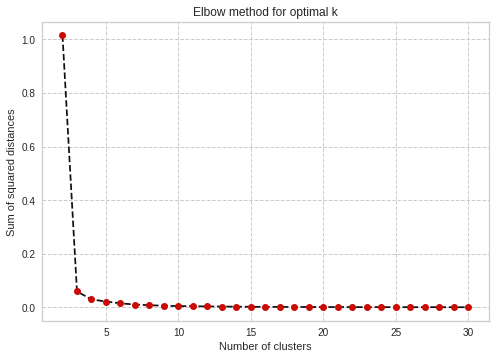

In [26]:
sum_squared_distance = []
range_n_clusters = range(2, 31)
for k in range_n_clusters:
    #Creating a kmeans clusterer
    clusterer = cluster.KMeans(n_clusters=k, random_state=1)
    #fitting the data
    clusterer.fit(selected_components_lle)
    sum_squared_distance.append(clusterer.inertia_) #adding sum of squares to the list
    
plt.plot(range_n_clusters, sum_squared_distance, 'ko--', mfc='r')
plt.xlabel('Number of clusters') #labelling x-axis
plt.ylabel('Sum of squared distances') #labelling y-axis
plt.title('Elbow method for optimal k') # giving title to plot
plt.grid(linestyle='--')
plt.show()

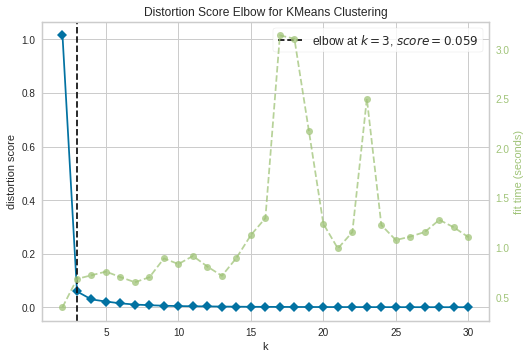

In [28]:
visualizer = KElbowVisualizer(cluster.KMeans(random_state=1), k=(2, 31), timings=True)
# Fit the data
visualizer.fit(selected_components_lle)
# Finalize and render figure
visualizer.show()

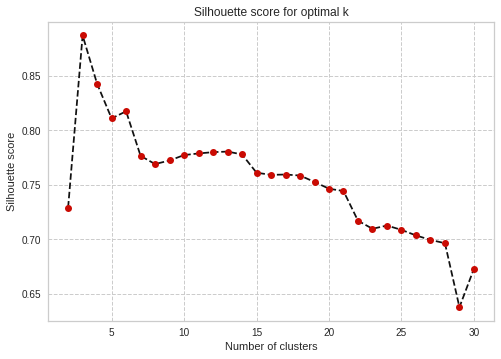

In [ ]:
silhouette_avg = []
#Calculating silhouette score for every cluster group
for k in range_n_clusters:
    clusterer = cluster.KMeans(n_clusters=k, random_state=1)
    #Fit the data
    clusterer.fit(selected_components_lle)
    cluster_labels = clusterer.labels_
    #appending the scores to a list
    silhouette_avg.append(silhouette_score(selected_components_lle, cluster_labels)) #adding silhouette score to list
    
plt.plot(range_n_clusters, silhouette_avg, 'ko--', mfc='r')
plt.xlabel('Number of clusters') #labelling x-axis
plt.ylabel('Silhouette score') # labelling y-axis
plt.title('Silhouette score for optimal k') # giving plot a title
plt.grid(linestyle='--')
plt.show()

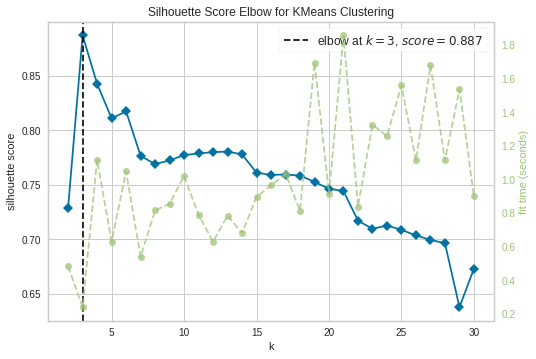

In [ ]:
visualizer = KElbowVisualizer(cluster.KMeans(random_state=1), k=(2, 31), metric='silhouette', timings=True)
# Fit the data
visualizer.fit(selected_components_lle)
# Finalize and render figure
visualizer.show()

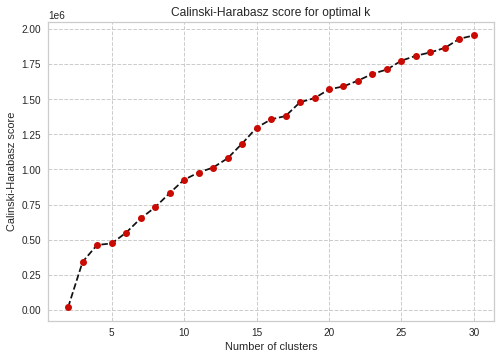

In [ ]:
calinski_harabasz = []
#Calculating calinski harabasz score for every cluster group

for k in range_n_clusters:
    # random state =1 for reproducibility
    clusterer = cluster.KMeans(n_clusters=k, random_state=1)
    #Fit the data
    clusterer.fit(selected_components_lle)
    cluster_labels = clusterer.labels_
    #appending the scores to a list
    calinski_harabasz.append(calinski_harabasz_score(selected_components_lle, cluster_labels))

#Creating a pyplot for Calinski harabasz score    
plt.plot(range_n_clusters, calinski_harabasz, 'ko--', mfc='r')
plt.xlabel('Number of clusters') #labelling x-axis
plt.ylabel('Calinski-Harabasz score') # labelling y-axis
plt.title('Calinski-Harabasz score for optimal k') # giving title to plot
plt.grid(linestyle='--')
plt.show()

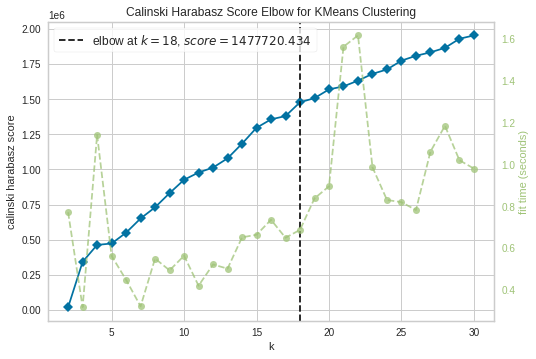

In [ ]:
visualizer = KElbowVisualizer(cluster.KMeans(random_state=1), k=(2, 31), metric='calinski_harabasz', timings=True)
# Fit the data
visualizer.fit(selected_components_lle)
# Finalize and render figure
visualizer.show()

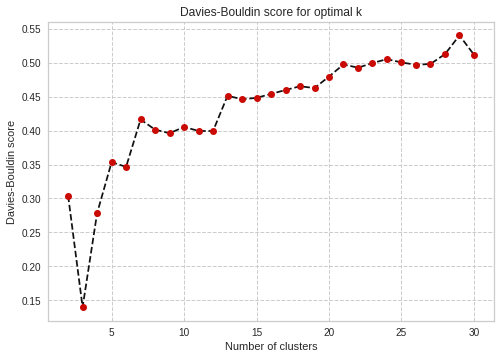

In [ ]:
davies_bouldin = []
# Calculating davies bouldin score for every cluster plot
for k in range_n_clusters:
    # random state =1 for reproducibility
    clusterer = cluster.KMeans(n_clusters=k, random_state=1)
    #fit the data
    clusterer.fit(selected_components_lle)
    cluster_labels = clusterer.labels_
    #calculating davies bouldin score and appending it to list
    davies_bouldin.append(davies_bouldin_score(selected_components_lle, cluster_labels))
    
plt.plot(range_n_clusters, davies_bouldin, 'ko--', mfc='r')
plt.xlabel('Number of clusters') # labelling x-axis
plt.ylabel('Davies-Bouldin score') # labelling y-axis
plt.title('Davies-Bouldin score for optimal k') #giving the plot a title
plt.grid(linestyle='--')
plt.show()